In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/monthly_milk_production.csv',parse_dates=True,index_col='Date')
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [ ]:
df.shape

(168, 1)

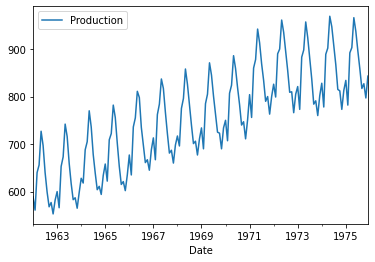

In [ ]:
df.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


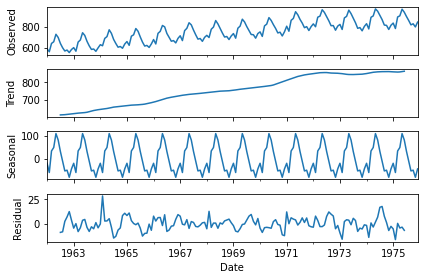

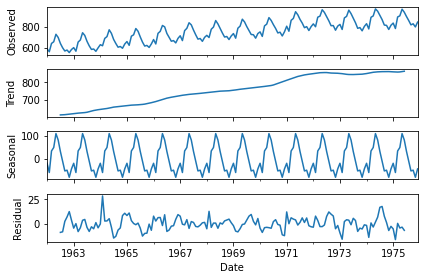

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df['Production'])
res.plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

In [ ]:
data

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [ ]:
train = data[:156]
test = data[156:]
train1 = df[:156]
test1 = df[156:]

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
input = 3
features = 1
generator = TimeseriesGenerator(train, train, length=3, batch_size=1)

In [ ]:
X,y=generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
generator = TimeseriesGenerator(train, train, length=12, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(12, 1)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
# fit model
sol = model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 2s 5ms/step - loss: 0.0419
Epoch 2/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0232
Epoch 3/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0196
Epoch 4/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0141
Epoch 5/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0113
Epoch 6/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0086
Epoch 7/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0060
Epoch 8/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0076
Epoch 9/50
144/144 [==============================] - 2s 10ms/step - loss: 0.0041
Epoch 10/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0044
Epoch 11/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0040
Epoch 12/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0036
Epoch 13/50
144/144 

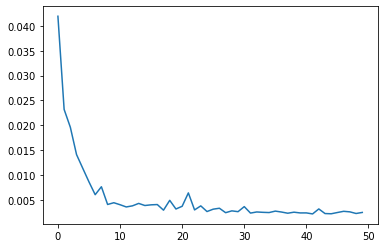

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = train[-12:]
last_train_batch = last_train_batch.reshape((1, 12,1))

In [ ]:
model.predict(last_train_batch)

array([[0.6381259]], dtype=float32)

In [ ]:
test[0]

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = train[-12:]
current_batch = first_eval_batch.reshape((1, 12,1))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.6381259], dtype=float32),
 array([0.61325586], dtype=float32),
 array([0.8192731], dtype=float32),
 array([0.89703107], dtype=float32),
 array([1.016893], dtype=float32),
 array([0.99228346], dtype=float32),
 array([0.90878594], dtype=float32),
 array([0.7926749], dtype=float32),
 array([0.670413], dtype=float32),
 array([0.6252035], dtype=float32),
 array([0.5752528], dtype=float32),
 array([0.61045206], dtype=float32)]

In [ ]:
test1.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test1['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test1.head()

,Production,Predictions
Date,,
1975-01-01,834,818.460373
1975-02-01,782,808.114437
1975-03-01,892,893.817616
1975-04-01,903,926.164925
1975-05-01,966,976.027500


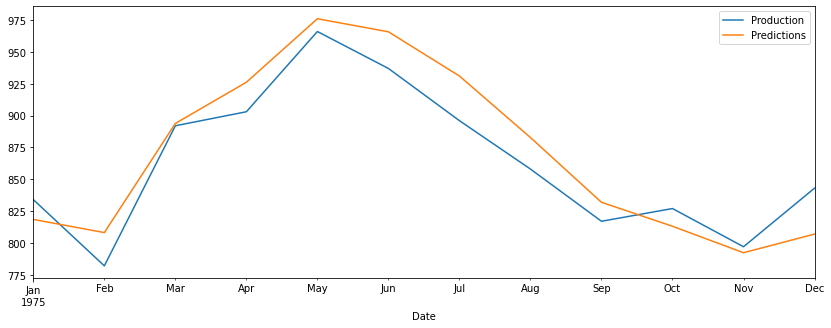

In [ ]:
test1.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test1['Production'],test1['Predictions']))
print(rmse)

22.30752408920451
